In [5]:


!pip install nbconvert
!pip install jupyter
!pip install pyppeteer

     -------------------------------------- 82.9/82.9 kB 581.2 kB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 580.9 kB/s eta 0:00:00


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import Dataset

dataset=pd.read_excel("D:\Learnbay\Stats & ML by Kumar Sundaram Sir\Documents\Employee_Data.xls")
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [3]:
#Q :How many datapoints and features we have ?

dataset.shape

(100, 7)

In [4]:
# Q :what are the columns name given in the dataset?

dataset.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')

In [5]:
#Q :Does data having missing data

dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [6]:
#Q : How much percent missing data is in the given dataset?

dataset.isnull().sum()/len(dataset)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

In [7]:
#Q : Check whether the missing data is number or char?

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [8]:
# Department :object-char  
        # approach :Mode

# Age & Experience :float64-num
       # approach: check Outlier
              # yes-Median
              # No -Mean

In [9]:
# copy the dataset

dataset1=dataset.copy()
dataset1.shape

(100, 7)

# 1.Handling Missing Values

## Approach no-1 : Manual Approach

In [10]:
dataset['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [11]:
dataset['Department']=dataset['Department'].fillna('Sales and Marketing')

dataset['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [12]:
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department      0
Age            18
Experience     10
Salary          0
dtype: int64

## Approach No -2 : sklearn package

In [13]:
dataset1.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [14]:
x=dataset1.iloc[:,3:].values
x

array([['Sales and Marketing', 28.0, 3.0, 32889],
       ['Sales and Marketing', 22.0, 1.0, 15944],
       ['Customer Relations', 22.0, 1.0, 40343],
       ['Customer Relations', 22.0, 1.0, 19018],
       ['Accounting', 27.0, 0.0, 24795],
       ['Accounting', 26.0, 5.0, 15387],
       ['Customer Relations', 24.0, 6.0, 34117],
       ['Customer Relations', 29.0, 2.0, 16099],
       ['Sales and Marketing', 29.0, 5.0, 42105],
       ['Customer Relations', 30.0, 6.0, 11891],
       ['Accounting', 26.0, 5.0, 34687],
       ['Sales and Marketing', 26.0, 6.0, 23549],
       ['Accounting', 24.0, 5.0, 29110],
       ['Accounting', 22.0, 2.0, 33435],
       ['Sales and Marketing', 25.0, 3.0, 11830],
       ['Accounting', 25.0, nan, 44065],
       ['Customer Relations', 22.0, nan, 13266],
       ['Accounting', 25.0, nan, 16631],
       ['Accounting', 27.0, nan, 29886],
       [nan, 25.0, nan, 30464],
       [nan, 22.0, nan, 14943],
       [nan, 22.0, nan, 18632],
       [nan, 24.0, nan, 38183],


In [15]:
# x is in array form, that's why we are using pd.DataFrame()
pd.DataFrame(x).isnull().sum()

0    19
1    18
2    10
3     0
dtype: int64

In [16]:
  # sklearn to handle char missing variable
0.
from sklearn.impute import SimpleImputer
impute =SimpleImputer(strategy='most_frequent')
# because departmant is char, so we used mode(most_frequent)
x[:,0:1] =impute.fit_transform(x[:,0:1])


In [17]:
pd.DataFrame(x).isnull().sum()

0     0
1    18
2    10
3     0
dtype: int64

In [18]:
pd.DataFrame(x)[0].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: 0, dtype: int64

In [19]:
x.shape

(100, 4)

In [20]:
dataset1.shape

(100, 7)

## Approach 1- Numeric Variable

In [21]:
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department      0
Age            18
Experience     10
Salary          0
dtype: int64

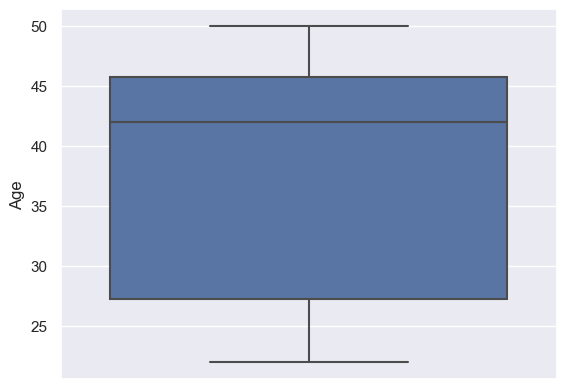

In [22]:
#checking outlier for Age
sns.boxplot(y='Age', data=dataset)
plt.show()

In [1]:
#checking outlier for Experience
sns.boxplot(y='Experience', data=dataset)

NameError: name 'sns' is not defined

In [24]:
dataset.describe()

,Employee Id,Age,Experience,Salary
count,100.000000,82.000000,90.000000,100.000000
mean,50.500000,37.975610,14.766667,65066.760000
std,29.011492,9.515388,6.889252,26189.874212
min,1.000000,22.000000,0.000000,11830.000000
25%,25.750000,27.250000,9.250000,48526.000000
50%,50.500000,42.000000,16.500000,73500.500000
75%,75.250000,45.750000,21.000000,86621.250000
max,100.000000,50.000000,25.000000,98180.000000


In [25]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())
dataset['Experience']=dataset['Experience'].fillna(dataset['Experience'].mean())

In [26]:
dataset.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

## Approach No-2 :sklearn concept to handle numerical missing variable

In [27]:
pd.DataFrame(x).isnull().sum()

0     0
1    18
2    10
3     0
dtype: int64

### How to check if the varaibles has outliers or not all at once

In [28]:
dataset

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795
...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0,79077
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0,81187
97,98,Brendan,Solis,Customer Relations,44.0,18.0,83847
98,99,Holmes,Nelson,Customer Relations,47.0,22.0,89158


In [29]:
dataset2=dataset.drop(['First Name','Last Name','Department'],axis=1)

In [30]:
dataset2.head(1)

,Employee Id,Age,Experience,Salary
0,1,28.0,3.0,32889


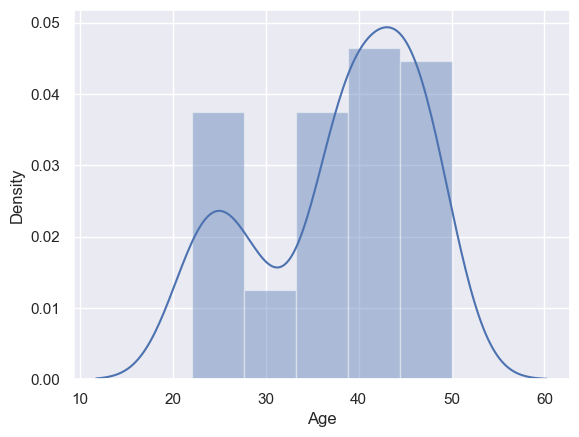

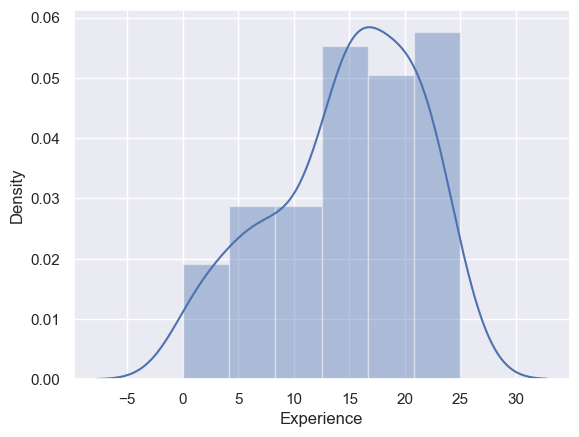

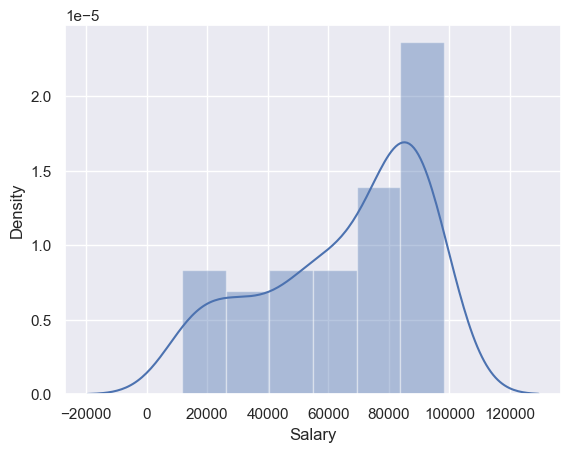

In [31]:
def distplots(col):
    sns.distplot(dataset2[col])
    plt.show()
    
for i in list(dataset2.columns)[1:]:
    distplots(i)

In [32]:
# in the above 3graphs all the 'x' values are in sequence, 
     # no where we see sudden spike or down, it means no outlier is there

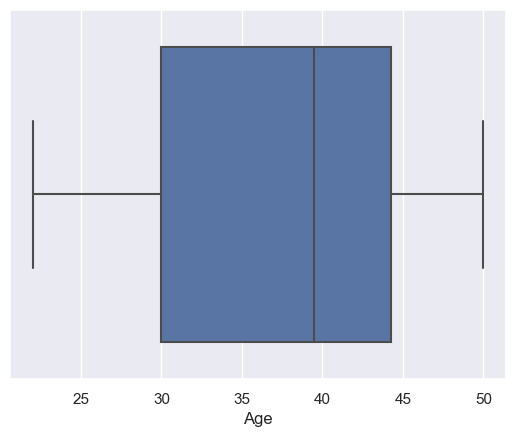

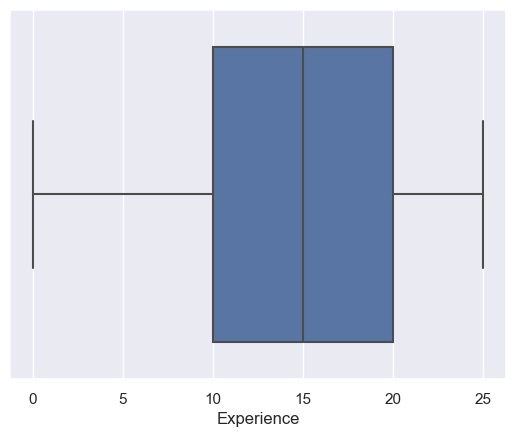

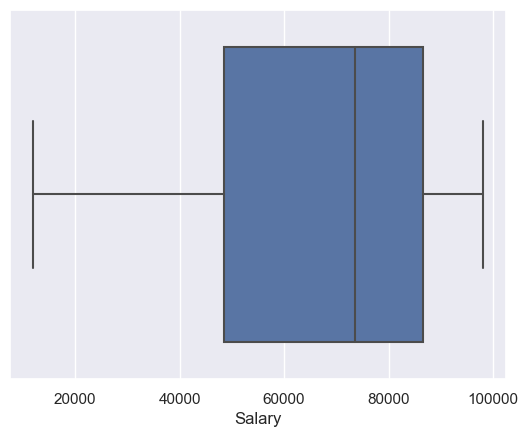

In [33]:
def boxplot(col):
    sns.boxplot(dataset2[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[1:]:
    boxplot(i)

In [34]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='mean')
x[:,1:3]=impute.fit_transform(x[:,1:3])


In [35]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

## 2. Encoding Concept

### part:1 Label Encoder

In [36]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [37]:
dataset['Department']=dataset['Department'].astype('category')
# converting department from object to categorical type
dataset['Department']=dataset['Department'].cat.codes
# this line of code converts  categorical to codes(integer)

In [38]:
dataset.head(10)

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,2,28.0,3.0,32889
1,2,Sheila,Garza,2,22.0,1.0,15944
2,3,John,Bryant,1,22.0,1.0,40343
3,4,Christian,Farley,1,22.0,1.0,19018
4,5,Colorado,Bowen,0,27.0,0.0,24795
5,6,Elijah,Matthews,0,26.0,5.0,15387
6,7,Bo,Mcleod,1,24.0,6.0,34117
7,8,Zena,Melendez,1,29.0,2.0,16099
8,9,Tucker,Michael,2,29.0,5.0,42105
9,10,Lucas,Rowe,1,30.0,6.0,11891


# One_Hot_Encoder Concept

## Approach -1

In [39]:
dataset=pd.get_dummies(dataset, columns=['Department'])

In [40]:
dataset.head()

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_0,Department_1,Department_2
0,1,Joy,Bass,28.0,3.0,32889,0,0,1
1,2,Sheila,Garza,22.0,1.0,15944,0,0,1
2,3,John,Bryant,22.0,1.0,40343,0,1,0
3,4,Christian,Farley,22.0,1.0,19018,0,1,0
4,5,Colorado,Bowen,27.0,0.0,24795,1,0,0


In [41]:
# dummy variable drop(n-1)
dataset = dataset.drop(['Department_0'],axis = 1)

In [42]:
dataset.head()

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_1,Department_2
0,1,Joy,Bass,28.0,3.0,32889,0,1
1,2,Sheila,Garza,22.0,1.0,15944,0,1
2,3,John,Bryant,22.0,1.0,40343,1,0
3,4,Christian,Farley,22.0,1.0,19018,1,0
4,5,Colorado,Bowen,27.0,0.0,24795,0,0


In [43]:
# just crosschecking is there any missing data
pd.DataFrame(x).head()

,0,1,2,3
0,Sales and Marketing,28.0,3.0,32889
1,Sales and Marketing,22.0,1.0,15944
2,Customer Relations,22.0,1.0,40343
3,Customer Relations,22.0,1.0,19018
4,Accounting,27.0,0.0,24795


In [44]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

# Encoding Method by using sklearn(Approach-2)

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#LabelEncoder
encoding=LabelEncoder()
x[:,0]=encoding.fit_transform(x[:,0])

In [46]:
pd.DataFrame(x).head(10)

,0,1,2,3
0,2,28.0,3.0,32889
1,2,22.0,1.0,15944
2,1,22.0,1.0,40343
3,1,22.0,1.0,19018
4,0,27.0,0.0,24795
5,0,26.0,5.0,15387
6,1,24.0,6.0,34117
7,1,29.0,2.0,16099
8,2,29.0,5.0,42105
9,1,30.0,6.0,11891


In [47]:
# One Hot Encoder
columntransfer =ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder='passthrough')

In [48]:
columntransfer

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [49]:
x=columntransfer.fit_transform(x)

In [50]:
pd.DataFrame(x).head(10)

,0,1,2,3,4,5
0,0.0,0.0,1.0,28.0,3.0,32889
1,0.0,0.0,1.0,22.0,1.0,15944
2,0.0,1.0,0.0,22.0,1.0,40343
3,0.0,1.0,0.0,22.0,1.0,19018
4,1.0,0.0,0.0,27.0,0.0,24795
5,1.0,0.0,0.0,26.0,5.0,15387
6,0.0,1.0,0.0,24.0,6.0,34117
7,0.0,1.0,0.0,29.0,2.0,16099
8,0.0,0.0,1.0,29.0,5.0,42105
9,0.0,1.0,0.0,30.0,6.0,11891


In [51]:
pd.DataFrame(x).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       100 non-null    object
 1   1       100 non-null    object
 2   2       100 non-null    object
 3   3       100 non-null    object
 4   4       100 non-null    object
 5   5       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


# 4. Feature Scaling

## Normalization and Standardization

### Approach -1 : Standardization

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_fs_sc=sc.fit_transform(x)
pd.DataFrame(x_fs_sc)

,0,1,2,3,4,5
0,-0.608164,-0.561951,1.020204,-1.164851,-1.810449,-1.234823
1,-0.608164,-0.561951,1.020204,-1.865471,-2.118174,-1.885089
2,-0.608164,1.779513,-0.980196,-1.865471,-2.118174,-0.948776
3,-0.608164,1.779513,-0.980196,-1.865471,-2.118174,-1.767124
4,1.644294,-0.561951,-0.980196,-1.281621,-2.272037,-1.545431
...,...,...,...,...,...,...
95,-0.608164,-0.561951,1.020204,1.053777,1.112939,0.537644
96,-0.608164,-0.561951,1.020204,0.937007,0.805214,0.618615
97,-0.608164,1.779513,-0.980196,0.703468,0.497489,0.720693
98,-0.608164,1.779513,-0.980196,1.053777,1.112939,0.924503


### Normalization

In [53]:
from sklearn.preprocessing import Normalizer
nor=Normalizer()
x_fs_nor=nor.fit_transform(x)
pd.DataFrame(x_fs_nor)

,0,1,2,3,4,5
0,0.000000,0.000000,0.000030,0.000851,0.000091,1.000000
1,0.000000,0.000000,0.000063,0.001380,0.000063,0.999999
2,0.000000,0.000025,0.000000,0.000545,0.000025,1.000000
3,0.000000,0.000053,0.000000,0.001157,0.000053,0.999999
4,0.000040,0.000000,0.000000,0.001089,0.000000,0.999999
...,...,...,...,...,...,...
95,0.000000,0.000000,0.000013,0.000594,0.000278,1.000000
96,0.000000,0.000000,0.000012,0.000567,0.000246,1.000000
97,0.000000,0.000012,0.000000,0.000525,0.000215,1.000000
98,0.000000,0.000011,0.000000,0.000527,0.000247,1.000000


# NEW DATASET-PLACEMENT

In [54]:
dset=pd.read_csv("D:\Learnbay\Stats & ML by Kumar Sundaram Sir\Documents\placement.csv")
dset.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


# 3. Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

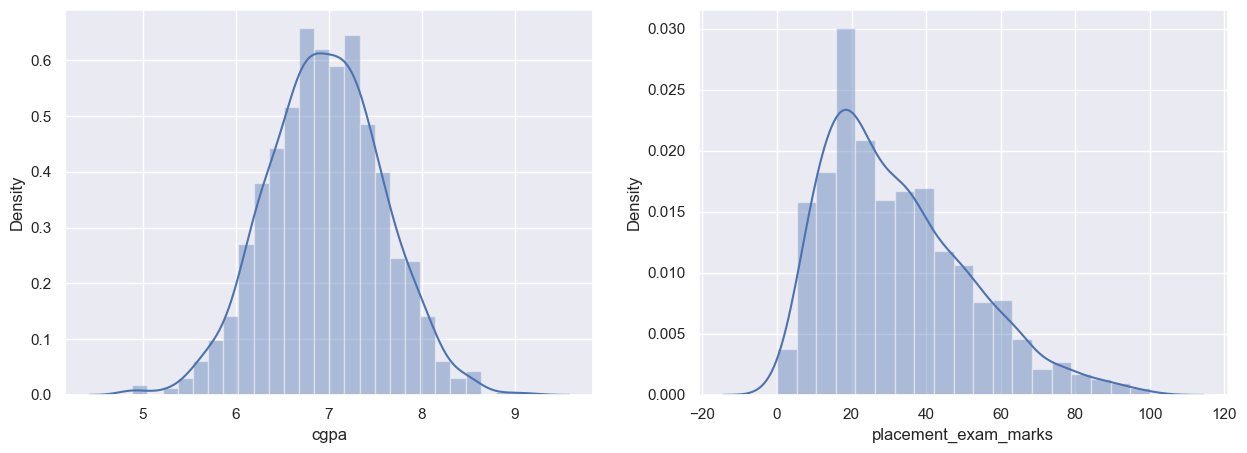

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dset['cgpa'])

plt.subplot(1,2,2)
sns.distplot(dset['placement_exam_marks'])

plt. show

In [56]:
# cgpa-normal distribution
#placement_exam_marks - right skewed distributed


# Normal Distribution Method(CGPA)

In [57]:
print("Mean value of cgpa :", dset['cgpa'].mean())
print()
print("std value of cgpa :", dset['cgpa'].std())
print()
print("Min value of cgpa :", dset['cgpa'].min())
print()
print("Max value of cgpa :", dset['cgpa'].max())
print()

Mean value of cgpa : 6.96124000000001

std value of cgpa : 0.6158978751323894

Min value of cgpa : 4.89

Max value of cgpa : 9.12



In [58]:
# Finding the boundary values
print("Highest point",dset['cgpa'].mean() + 3*dset['cgpa'].std())
# mew+3sigma

print()

print('Lowest point',dset['cgpa'].mean() -3*dset['cgpa'].std())
# mew-3sigma

Highest point 8.808933625397177

Lowest point 5.113546374602842


## Trimming the Outliers

### Approach-1

In [59]:
# Finding the outliers

dset[(dset['cgpa']>8.8) | (dset['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [60]:
new_df = dset[(dset['cgpa'] < 8.8) & (dset['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [61]:
# checking outliers in new dataset

new_df[(new_df['cgpa']>8.8) | (new_df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed


### Approach-2 (z_score)

In [62]:
dset['cgpa_zscore'] = (dset['cgpa']-dset['cgpa'].mean())/dset['cgpa'].std()
# Z-score = x-mew/sigma
dset['cgpa_zscore']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: cgpa_zscore, Length: 1000, dtype: float64

In [63]:
dset.shape

(1000, 4)

In [64]:
dset.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [65]:
# In Z-score approach anything above +3 and below - 3 are outliers
dset[dset['cgpa_zscore'] >3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [66]:
dset[dset['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [67]:
dset[(dset['cgpa_zscore'] >3) | (dset['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [68]:
# Trimming

In [69]:
new_df = dset[(dset['cgpa_zscore'] < 3) & (dset['cgpa_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping - Transformation Approach

In [70]:
upper_limit = dset['cgpa'].mean() + 3 *(dset['cgpa'].std())
print(upper_limit)
print()
lower_limit = dset['cgpa'].mean() - 3 *(dset['cgpa'].std())
print(lower_limit)

8.808933625397177

5.113546374602842


In [71]:
# capping method or transforming approach

dset['cgpa'] = np.where(dset['cgpa'] > upper_limit, upper_limit,
                       np.where(dset['cgpa'] < lower_limit,lower_limit,dset['cgpa']))

In [72]:
dset.shape

(1000, 4)

In [73]:
dset['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

<AxesSubplot:xlabel='cgpa'>

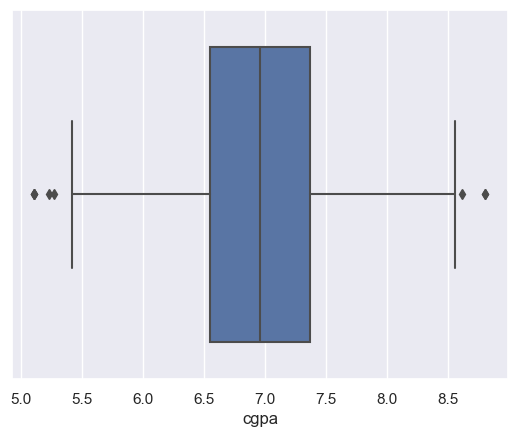

In [74]:
sns.boxplot(dset['cgpa'])



#  IQR Method(If data is skewed then we have to use)

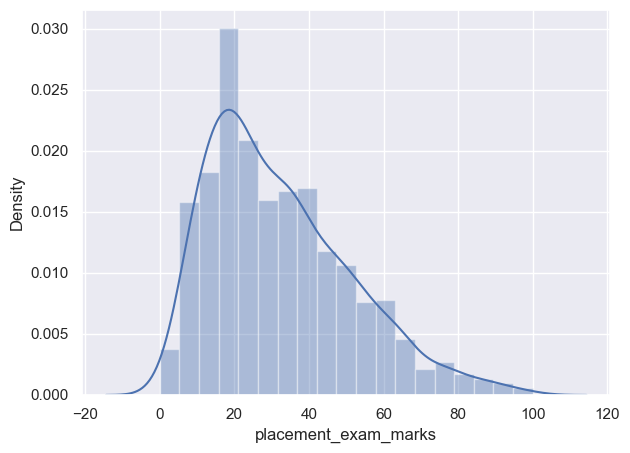

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dset['placement_exam_marks'])

plt. show()

In [76]:
dset['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

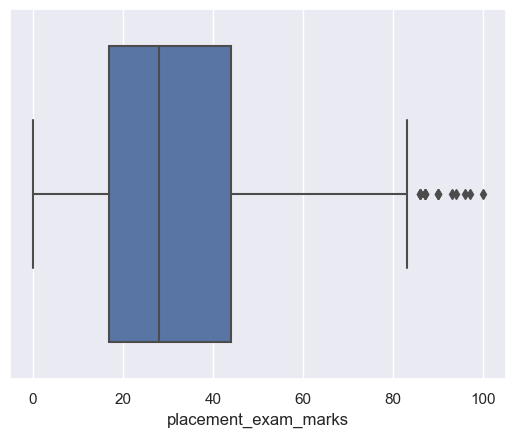

In [77]:
sns.boxplot(dset['placement_exam_marks'])

In [78]:
# This is right skewed as outliers are on right sidedset['placement_exam_marks']

In [79]:
# Finding IQR =Q3-Q1
#Q1 = 25th percentile
#Q3 = 75th percentile

percentile25 = dset['placement_exam_marks'].quantile(0.25)
percentile75 = dset['placement_exam_marks'].quantile(0.75)

print(percentile25)
print()
print(percentile75)


17.0

44.0


In [80]:
iqr = percentile75 - percentile25
iqr

27.0

In [81]:
upper_limit = percentile75 + 1.5*(iqr)

lower_limit = percentile25 - 1.5*(iqr)

print(upper_limit)
print()
print(lower_limit)

84.5

-23.5


In [82]:
# Finding the outliers in the dset

dset[dset['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


In [83]:
# Finding the outliers in the dset

dset[dset['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore


## Trimming

In [84]:
new_df1 = dset[(dset['placement_exam_marks'] < upper_limit) & (dset['placement_exam_marks'] > lower_limit)]


In [85]:
   new_df1.shape

(985, 4)

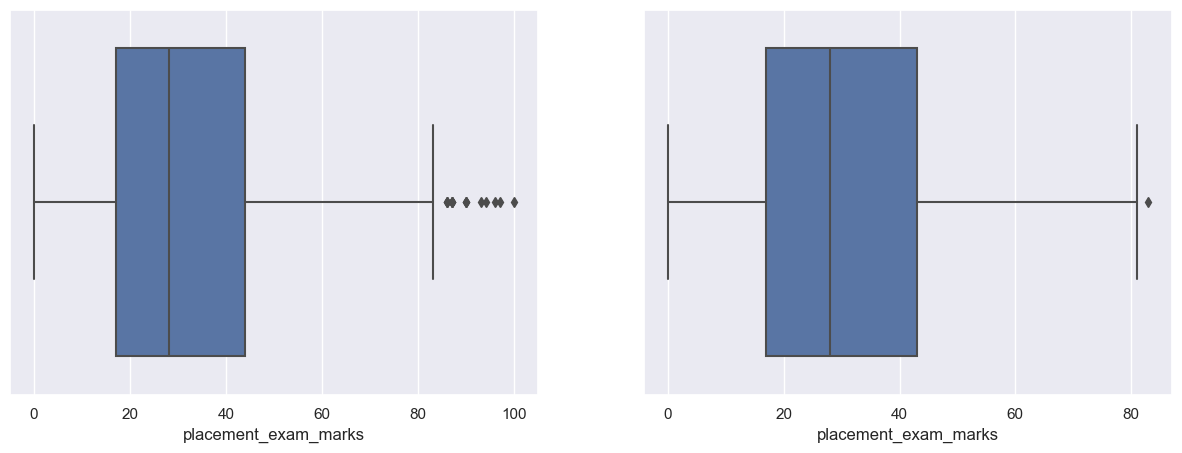

In [86]:
# comparing - outlier(rawdata) and after modifying outliers  

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(dset['placement_exam_marks'])

plt.subplot(1,2,2)
sns.boxplot(new_df1['placement_exam_marks'])

plt.show()

## Capping

In [87]:
new_df_cap = dset.copy()

In [88]:
new_df_cap.shape

(1000, 4)

In [89]:
new_df_cap.head(2)

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810


In [90]:
new_df_cap['placement_exam_marks'] = np.where(new_df_cap['placement_exam_marks'] >upper_limit, upper_limit,
                                             np.where(new_df_cap['placement_exam_marks'] < lower_limit,lower_limit,
                                                      new_df_cap['placement_exam_marks']))

In [91]:
new_df_cap.shape

(1000, 4)

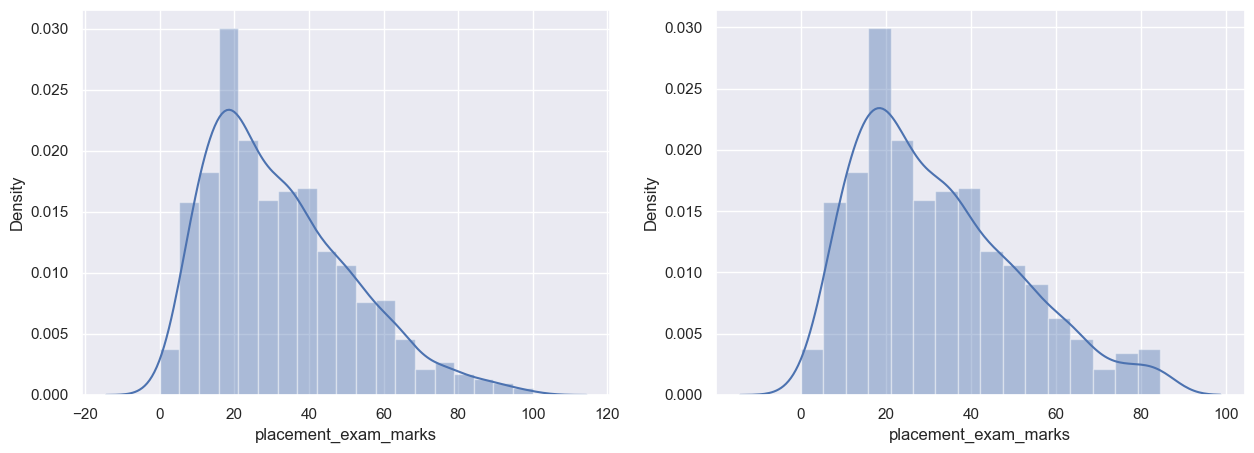

In [92]:
# comparing - outlier(rawdata) and after modifying outliers 

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dset['placement_exam_marks'])

plt.subplot(1,2,2)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.show()

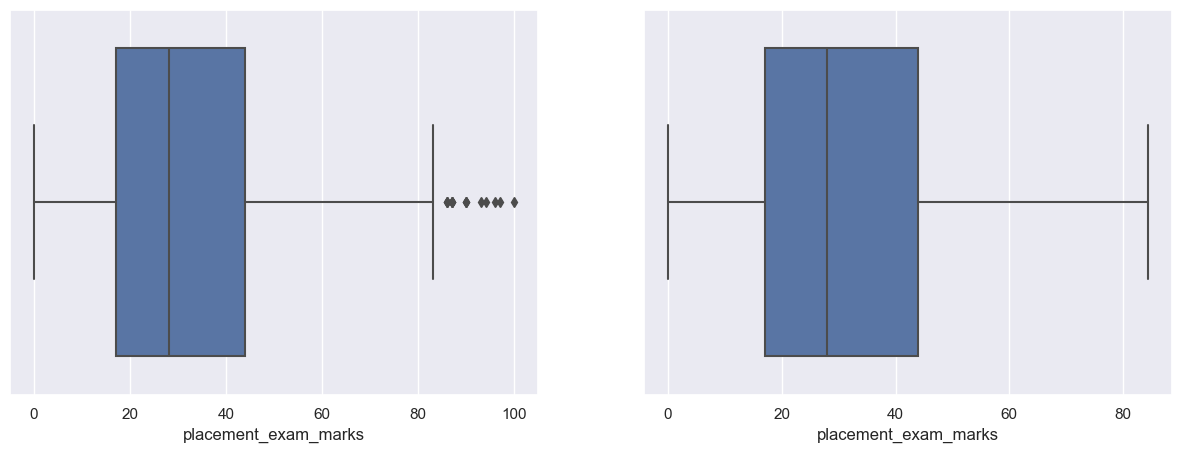

In [93]:
# comparing - outlier(rawdata) and after modifying outliers  

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(dset['placement_exam_marks'])

plt.subplot(1,2,2)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

In [94]:
# By comparing the trimming and capping approach , capping is the best method for two reasons
# 1.Data is not removing
# 2.By comparing boxplots from both methods, we can see outlier even after removal of it in trimming approach 

# 4.Feature Scaling



## Normalization and Standardization



### a.Standardization

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_fs_sc = sc.fit_transform(x)
pd.DataFrame(x_fs_sc)

,0,1,2,3,4,5
0,-0.608164,-0.561951,1.020204,-1.164851,-1.810449,-1.234823
1,-0.608164,-0.561951,1.020204,-1.865471,-2.118174,-1.885089
2,-0.608164,1.779513,-0.980196,-1.865471,-2.118174,-0.948776
3,-0.608164,1.779513,-0.980196,-1.865471,-2.118174,-1.767124
4,1.644294,-0.561951,-0.980196,-1.281621,-2.272037,-1.545431
...,...,...,...,...,...,...
95,-0.608164,-0.561951,1.020204,1.053777,1.112939,0.537644
96,-0.608164,-0.561951,1.020204,0.937007,0.805214,0.618615
97,-0.608164,1.779513,-0.980196,0.703468,0.497489,0.720693
98,-0.608164,1.779513,-0.980196,1.053777,1.112939,0.924503


### b. Normalization

In [96]:
from sklearn.preprocessing import Normalizer
nor = Normalizer()
x_sc_nor = nor.fit_transform(x)
pd.DataFrame(x_sc_nor)

,0,1,2,3,4,5
0,0.000000,0.000000,0.000030,0.000851,0.000091,1.000000
1,0.000000,0.000000,0.000063,0.001380,0.000063,0.999999
2,0.000000,0.000025,0.000000,0.000545,0.000025,1.000000
3,0.000000,0.000053,0.000000,0.001157,0.000053,0.999999
4,0.000040,0.000000,0.000000,0.001089,0.000000,0.999999
...,...,...,...,...,...,...
95,0.000000,0.000000,0.000013,0.000594,0.000278,1.000000
96,0.000000,0.000000,0.000012,0.000567,0.000246,1.000000
97,0.000000,0.000012,0.000000,0.000525,0.000215,1.000000
98,0.000000,0.000011,0.000000,0.000527,0.000247,1.000000


# 5.Handling Imbalance Dataset

In [97]:
credit = pd.read_csv("D:\Learnbay\Stats & ML by Kumar Sundaram Sir\Documents\creditcard.csv")
credit.shape

(284807, 31)

In [98]:
credit.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [99]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [100]:
credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Split the data into independent and dependent variable



In [101]:
x = credit.iloc[:,:-1]
y = credit.iloc[:, -1]

In [102]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [103]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## Under Sampling Method-Target:Majority Class

In [104]:
!pip install imblearn 

In [105]:
import seaborn

In [106]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
x_under, y_under = under.fit_resample(x,y)

In [107]:
print(y.value_counts())
print()
print(y_under.value_counts())

0    284315
1       492
Name: Class, dtype: int64

0    492
1    492
Name: Class, dtype: int64


## Under Sampling Method 2-NearMiss Technique

In [108]:
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
x_nearmiss, y_nearmiss = nearmiss.fit_resample(x,y)

In [109]:
print(y.value_counts())
print()
print(y_nearmiss.value_counts())

0    284315
1       492
Name: Class, dtype: int64

0    492
1    492
Name: Class, dtype: int64


In [110]:
# Removing such a huge amount of data is not acceptable

## OverSampling Method-1 - Target:Minority Class

In [111]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over, y_over = over.fit_resample(x,y)

In [112]:
print(y.value_counts())
print()
print(y_over.value_counts())

0    284315
1       492
Name: Class, dtype: int64

0    284315
1    284315
Name: Class, dtype: int64


## OverSampling Method-2 - Synthetic Minority OverSampling Techniques (SMOTE)

In [113]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

In [114]:
print(y.value_counts())
print()
print(y_smote.value_counts())

0    284315
1       492
Name: Class, dtype: int64

0    284315
1    284315
Name: Class, dtype: int64


In [3]:
# Just for information to check any variable is important or not
# Whether Department is significant variable or not
# check p-value

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('V27 ~ Class',data = credit).fit()
anova_result = sm.stats.anova_lm(model,typ = 2)
print(anova_result)

# if p<0.05 = it is significant
# if p> 0.05 = it is not significant

NameError: name 'credit' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the skewness and potential outliers
sns.boxplot(data['ability'])
plt.title("Boxplot of Ability (Before Outlier Treatment)")
plt.show()

# Compute IQR for detecting outliers
Q1 = data['ability'].quantile(0.25)  # 25th percentile
Q3 = data['ability'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Identify outliers
outliers = data[(data['ability'] < lower_bound) | (data['ability'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

# Handling Outliers: Choose an approach

## Option 1: Cap (Winsorize) Outliers
data['ability'] = np.where(data['ability'] < lower_bound, lower_bound, data['ability'])
data['ability'] = np.where(data['ability'] > upper_bound, upper_bound, data['ability'])

## Option 2: Remove Outliers
# data = data[(data['ability'] >= lower_bound) & (data['ability'] <= upper_bound)]

## Option 3: Impute Outliers with Median
# median_ability = data['ability'].median()
# data['ability'] = np.where(data['ability'] < lower_bound, median_ability, data['ability'])
# data['ability'] = np.where(data['ability'] > upper_bound, median_ability, data['ability'])

# Visualize the results
sns.boxplot(data['ability'])
plt.title("Boxplot of Ability (After Outlier Treatment)")
plt.show()

# Verify the skewness after treatment
print("Skewness after treatment:", data['ability'].skew())


In [1]:
100/(2*60)

0.8333333333333334

In [2]:
100/(2*40)

1.25